In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def calculate_output(target, current, dt, accel_rate, accel_threshold,
                     accel_start_threshold, decel_rate, decel_threshold,
                     decel_start_threshold, verbose=False):
    # target = self.__target[axis]
    # current = self.__current[axis]
    # accel_rate = self.acceleration_rate
    # accel_threshold = self.acceleration_threshold
    # accel_start_threshold = self.acceleration_start_threshold
    # decel_rate = self.deceleration_rate
    # decel_threshold = self.deceleration_threshold
    # decel_start_threshold = self.deceleration_start_threshold 
    if abs(target) > abs(current):  # Acceleration required
        state = "Acceleration required"
        if abs(current) >= accel_threshold:
            output = target
        elif abs(current) < accel_start_threshold:
            if abs(target) <= accel_start_threshold:
                output = target
            else:
                output = accel_start_threshold
                if target < 0:
                    output *= -1.0
        else:  # Controlled acceleration
            if current != 0 and target != 0 and abs(current) + abs(target) > abs(current + target):
                current *= -1
            step = accel_rate * dt
            if abs(target - current) < abs(step):
                step = abs(target - current)
            if target < 0:
                step *= -1.0
            output = current + step
    elif abs(target) < abs(current): # Deceleration required
        state = "Deceleration required"
        if abs(current) <= abs(decel_threshold):
            output = target
        elif abs(current) > decel_start_threshold:
            if abs(target) >= decel_start_threshold:
                output = target
            else:
                output = decel_start_threshold
                if target < 0 or (target >= 0 > current):
                    output *= -1.0
        else:
            step = decel_rate * dt
            if (abs(current) - abs(step)) < abs(target):
                step = abs(current) - abs(target)
            if current > 0:
                step *= -1.0
            output = current + step
    elif target == current:
        state = "Target reached"
        output = current
    else:  # target != current and abs(target) == abs(current)
        state = "Opposite sign required"
        output = -current
    if current != target and verbose:
        print(f"In: {target:.1f}% Out: "
              f"{current:.1f}% -> {output:.1f}% ({state})")
    return output

fs = 20  # Hz
dt = 1/fs  # sampling period
t_end = 20  # simulation end in secs
t = np.arange(0, t_end, dt)
last_t = 0.0
t = []
while last_t <= t_end:
    t.append(last_t)
    desired_dt = 1/fs
    dt = desired_dt + (random.random() * 2 - 1) * 0.01 * desired_dt
    last_t += dt

t = np.array(t)
# print(t)
acceleration_rate = 25  # %/sec
acceleration_threshold = 85  # %
acceleration_start_threshold = 60  # %
deceleration_rate = 50  # %/sec
deceleration_threshold = 25  # %
deceleration_start_threshold = 75  # %
# print(acceleration_rate, deceleration_rate)

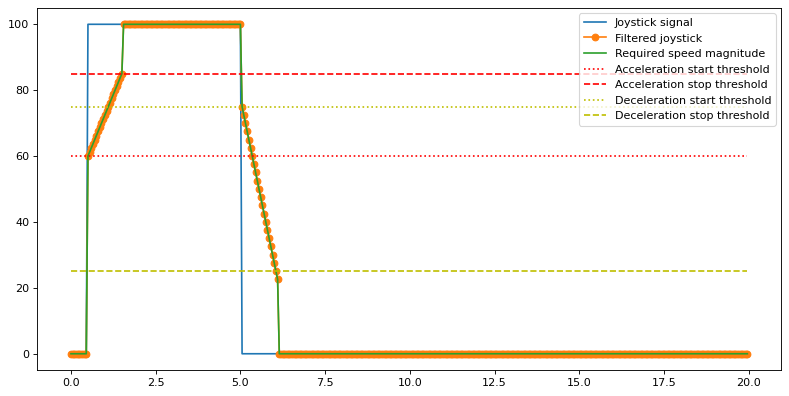

In [2]:
# Case 1: 0 to 100
x = np.where((0.5 < t) & (t < 5), 100, 0)
y0 = 0.0
plt.figure(figsize=(12, 6), dpi=80)        
plt.plot(t,x, label='Joystick signal')
y = np.zeros(len(t))
dy_dt = np.zeros(len(t))
for idx in range(len(t)):
    if idx > 0:
        dt = t[idx] - t[idx - 1]
        y[idx] = calculate_output(x[idx], y[idx - 1], dt, acceleration_rate,
                                  acceleration_threshold, 
                                  acceleration_start_threshold,
                                  deceleration_rate, 
                                  deceleration_threshold,
                                  deceleration_start_threshold)
        dy_dt[idx] = (y[idx] - y[idx - 1])/dt
    else:
        y[0] = y0
        dy_dt[0] = 0
plt.plot(t,y, 'o-', label='Filtered joystick')
ax = plt.plot(t,np.abs(y), label='Required speed magnitude')
ax = plt.plot(t,np.ones(len(t))*acceleration_start_threshold, 'r:', label='Acceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*acceleration_threshold, 'r--', label='Acceleration stop threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_start_threshold, 'y:', label='Deceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_threshold, 'y--', label='Deceleration stop threshold')
_ = plt.legend(loc='upper right')

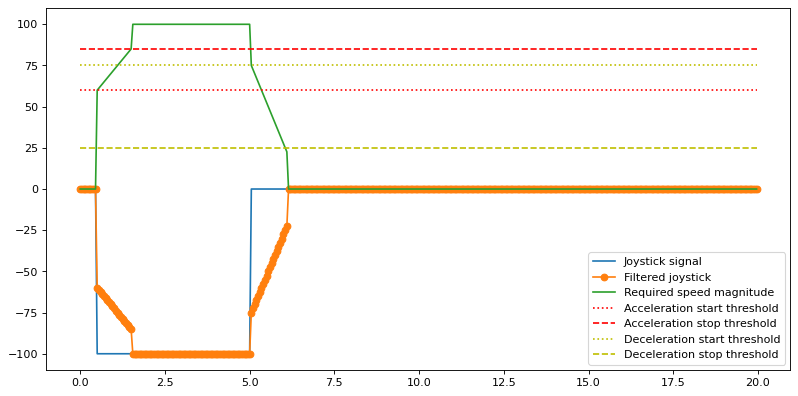

In [3]:
# Case 1: 0 to 100
x = np.where((0.5 < t) & (t < 5), -100, 0)
y0 = 0.0
plt.figure(figsize=(12, 6), dpi=80)        
plt.plot(t,x, label='Joystick signal')
y = np.zeros(len(t))
dy_dt = np.zeros(len(t))
for idx in range(len(t)):
    if idx > 0:
        dt = t[idx] - t[idx - 1]
        y[idx] = calculate_output(x[idx], y[idx - 1], dt, acceleration_rate,
                                  acceleration_threshold, 
                                  acceleration_start_threshold,
                                  deceleration_rate, 
                                  deceleration_threshold,
                                  deceleration_start_threshold)
        dy_dt[idx] = (y[idx] - y[idx - 1])/dt
    else:
        y[0] = y0
        dy_dt[0] = 0
plt.plot(t,y, 'o-', label='Filtered joystick')
ax = plt.plot(t,np.abs(y), label='Required speed magnitude')
ax = plt.plot(t,np.ones(len(t))*acceleration_start_threshold, 'r:', label='Acceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*acceleration_threshold, 'r--', label='Acceleration stop threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_start_threshold, 'y:', label='Deceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_threshold, 'y--', label='Deceleration stop threshold')
_ = plt.legend(loc='lower right')

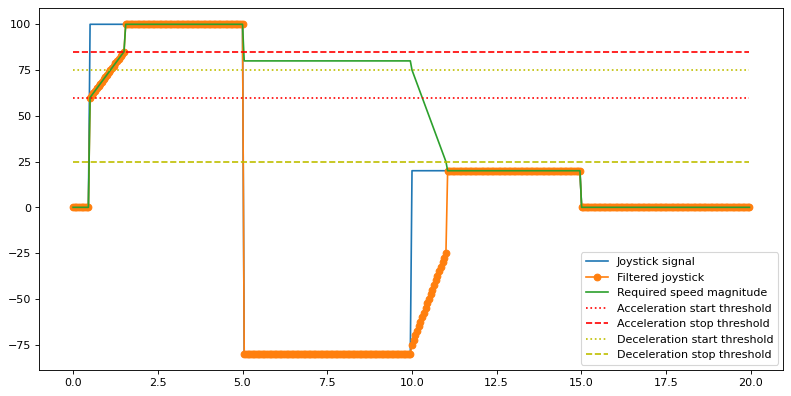

In [4]:
# Case 3: 100 -> -80 -> 20 -> 0
x = np.where((0.5 < t) & (t <= 5), 100, 0) \
    + np.where((5 < t) & (t <= 10), -80, 0) \
    + np.where((10 < t) & (t <= 15), 20, 0)
y0 = 0.0
plt.figure(figsize=(12, 6), dpi=80)        
plt.plot(t,x, label='Joystick signal')
y = np.zeros(len(t))
dy_dt = np.zeros(len(t))
for idx in range(len(t)):
    if idx > 0:
        dt = t[idx] - t[idx - 1]
        y[idx] = calculate_output(x[idx], y[idx - 1], dt, acceleration_rate,
                                  acceleration_threshold, 
                                  acceleration_start_threshold,
                                  deceleration_rate, 
                                  deceleration_threshold,
                                  deceleration_start_threshold)
        dy_dt[idx] = (y[idx] - y[idx - 1])/dt
    else:
        y[0] = y0
        dy_dt[0] = 0
ax = plt.plot(t,y, 'o-', label='Filtered joystick')
ax = plt.plot(t,np.abs(y), label='Required speed magnitude')
ax = plt.plot(t,np.ones(len(t))*acceleration_start_threshold, 'r:', label='Acceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*acceleration_threshold, 'r--', label='Acceleration stop threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_start_threshold, 'y:', label='Deceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_threshold, 'y--', label='Deceleration stop threshold')
_ = plt.legend(loc='lower right')


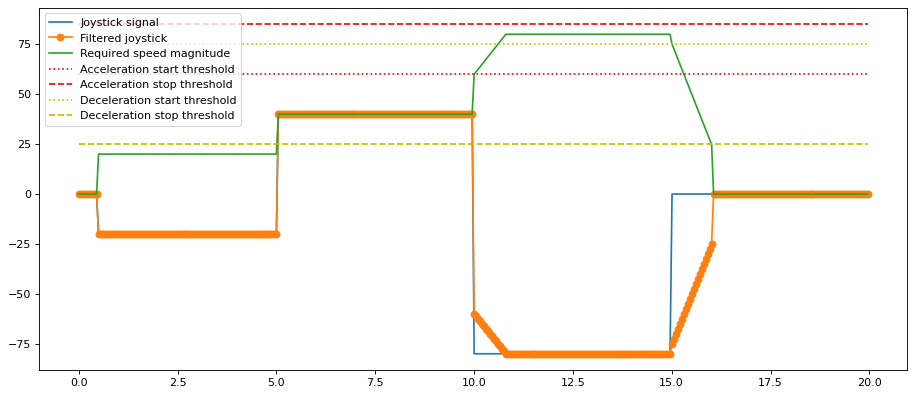

In [5]:
# Case 4: -20 -> 40 -> -80 -> 0
x = np.where((0.5 < t) & (t <= 5), -20, 0) \
    + np.where((5 < t) & (t <= 10), 40, 0) \
    + np.where((10 < t) & (t <= 15), -80, 0)
y0 = 0.0
plt.figure(figsize=(14, 6), dpi=80)        
plt.plot(t,x, label='Joystick signal')
y = np.zeros(len(t))
dy_dt = np.zeros(len(t))
for idx in range(len(t)):
    if idx > 0:
        y[idx] = calculate_output(x[idx], y[idx - 1], dt, acceleration_rate,
                                  acceleration_threshold, 
                                  acceleration_start_threshold,
                                  deceleration_rate, 
                                  deceleration_threshold,
                                  deceleration_start_threshold)
        dy_dt[idx] = (y[idx] - y[idx - 1])/dt
    else:
        y[0] = y0
        dy_dt[0] = 0
ax = plt.plot(t,y, 'o-', label='Filtered joystick')
ax = plt.plot(t,np.abs(y), label='Required speed magnitude')
ax = plt.plot(t,np.ones(len(t))*acceleration_start_threshold, 'r:', label='Acceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*acceleration_threshold, 'r--', label='Acceleration stop threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_start_threshold, 'y:', label='Deceleration start threshold')
ax = plt.plot(t,np.ones(len(t))*deceleration_threshold, 'y--', label='Deceleration stop threshold')
_ = plt.legend(loc='upper left')